# Credit Card Fraud Detection using Supervised Learning

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
card = pd.read_csv('Copy of credit_card_data.csv')
card.head()

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,1,2748.58,14.23,Travel,77,Female,37407,Suburban,1,1
1,2,3578.79,0.24,Travel,34,Male,197616,Suburban,0,0
2,3,3017.79,11.42,Travel,43,Female,114748,Urban,3,1
3,4,2728.97,17.01,Travel,75,Female,96347,Rural,4,1
4,5,2124.04,1.06,Online,48,Male,151085,Suburban,3,1


## Exploratory data analysis

In [3]:

card.describe()

,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2484.648500,12.272320,48.828000,110814.807000,2.523000,0.719000
std,288.819436,1450.813956,7.178521,17.898737,52412.165515,1.671606,0.449712
min,1.000000,12.720000,0.010000,18.000000,20030.000000,0.000000,0.000000
25%,250.750000,1245.592500,6.127500,34.000000,67140.750000,1.000000,0.000000
50%,500.500000,2411.800000,12.470000,50.000000,109850.500000,2.000000,1.000000
75%,750.250000,3688.930000,18.672500,64.000000,157228.500000,4.000000,1.000000
max,1000.000000,4999.040000,23.960000,79.000000,199422.000000,5.000000,1.000000


In [4]:
card.dtypes

TransactionID            int64
TransactionAmount      float64
TransactionTime        float64
MerchantCategory        object
CustomerAge              int64
CustomerGender          object
CustomerIncome           int64
TransactionLocation     object
PreviousFraudCount       int64
Fraud                    int64
dtype: object

In [5]:
card.isnull().sum()

TransactionID          0
TransactionAmount      0
TransactionTime        0
MerchantCategory       0
CustomerAge            0
CustomerGender         0
CustomerIncome         0
TransactionLocation    0
PreviousFraudCount     0
Fraud                  0
dtype: int64

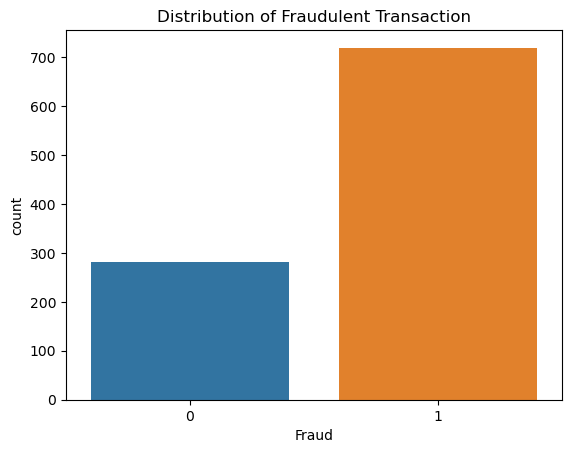

In [6]:
# Distribution of target variable
sns.countplot(x = 'Fraud', data = card)
plt.title('Distribution of Fraudulent Transaction')
plt.show()

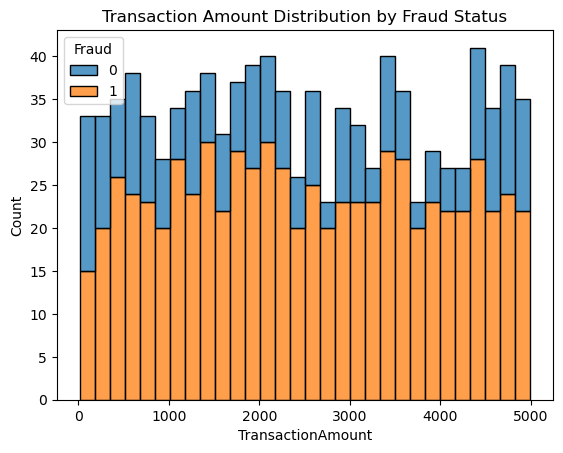

In [7]:
# Distribution of Transaction Amount by Fraud Status

sns.histplot(data=card, x = 'TransactionAmount', hue = 'Fraud', multiple = 'stack', bins = 30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

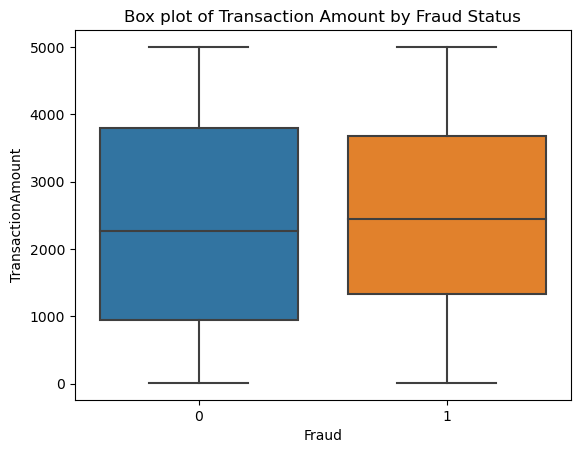

In [8]:
# Box plot for Transaction Amount by Fraud status

sns.boxplot(x = 'Fraud', y = 'TransactionAmount', data = card)
plt.title('Box plot of Transaction Amount by Fraud Status')
plt.show()

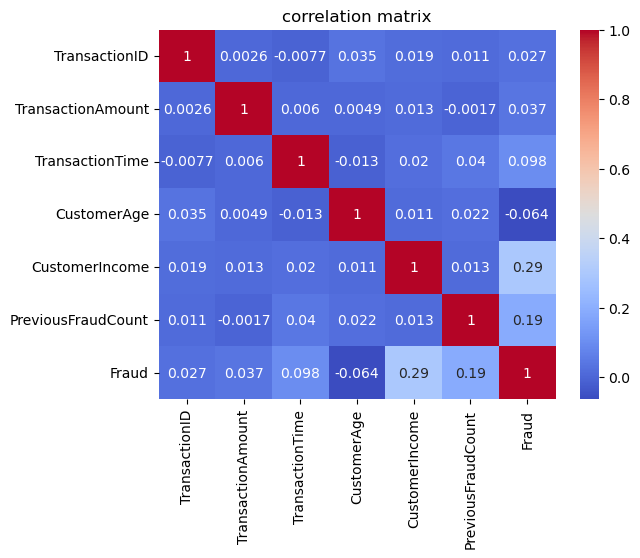

In [9]:
# Correlation matrix
num_cols = list()
for column in card.columns:
    if card[column].dtype != object:
        num_cols.append(column)
correlation_matrix = card[num_cols].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('correlation matrix')
plt.show()

## Preprocessing

In [10]:
#Encode categorical variables
label_encoders= {}
for column in ['MerchantCategory', 'CustomerGender', 'TransactionLocation']:
    le = LabelEncoder()
    card[column]=le.fit_transform(card[column])
    label_encoders[column] = le
    
#Features and target
X = card.drop(['TransactionID', 'Fraud'], axis = 1)
y = card['Fraud']

In [11]:
X.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,2748.58,14.23,3,77,0,37407,1,1
1,3578.79,0.24,3,34,1,197616,1,0
2,3017.79,11.42,3,43,0,114748,2,3
3,2728.97,17.01,3,75,0,96347,0,4
4,2124.04,1.06,0,48,1,151085,1,3


In [12]:
# Split data into tarining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred =logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [15]:
# Display accuracy and performance metrics
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 76.00

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.29      0.42        89
           1       0.76      0.96      0.85       211

    accuracy                           0.76       300
   macro avg       0.75      0.62      0.63       300
weighted avg       0.76      0.76      0.72       300



# Building a model using KNN algorithm

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [18]:
# Display accuracy and performance metrics
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy*100:.2f}')
print('\n K-Nearest Neighbors Classification Report:')
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 74.67

 K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        89
           1       0.78      0.90      0.83       211

    accuracy                           0.75       300
   macro avg       0.70      0.64      0.65       300
weighted avg       0.73      0.75      0.73       300



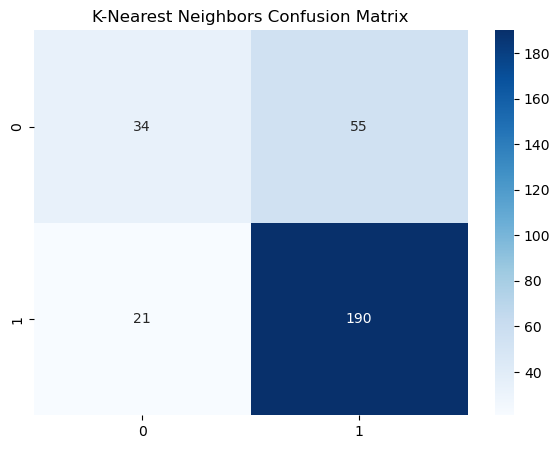

In [19]:
# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

## Building a model using Decision Tree Algorithm

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [22]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

In [23]:
# Display accuracy and performance metrics
print(f'Decision Tree Accuracy : {decision_tree_accuracy*100:.2f}')
print('\n Decision Tree Classification Report:')
print(classification_report(y_test, decision_tree_pred))

Decision Tree Accuracy : 68.33

 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.35      0.39        89
           1       0.75      0.82      0.79       211

    accuracy                           0.68       300
   macro avg       0.60      0.59      0.59       300
weighted avg       0.66      0.68      0.67       300



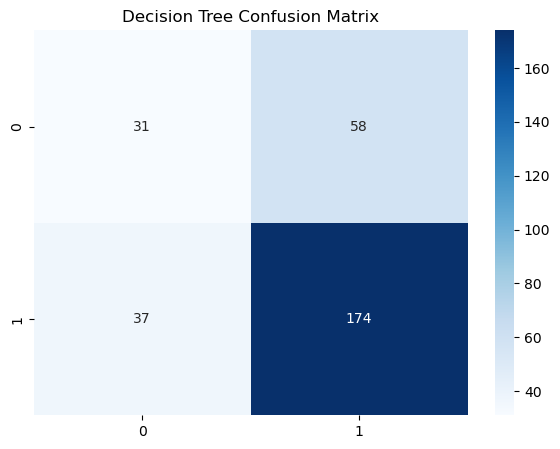

In [24]:
# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, decision_tree_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Building a Model using Random Forest Algorithm

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramete

In [28]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy*100:.2f}%")

Accuracy:76.00%


In [30]:
#Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.37      0.48        89
           1       0.78      0.92      0.84       211

    accuracy                           0.76       300
   macro avg       0.73      0.65      0.66       300
weighted avg       0.75      0.76      0.74       300



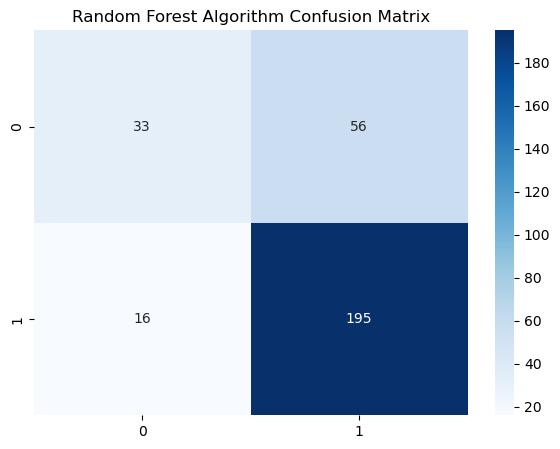

In [31]:

# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Random Forest Algorithm Confusion Matrix')
plt.show()

# Building a model using Support Vector Machine Algorithm

In [33]:
from sklearn.svm import SVC
# Support vector machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)


In [34]:
# Display accuracy and performance metrics
print(f'SVM  Accuracy : {svm_accuracy*100:.2f}')
print('\n SVM Classification Report:')
print(classification_report(y_test, svm_pred))

SVM  Accuracy : 76.33

 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.33      0.45        89
           1       0.77      0.95      0.85       211

    accuracy                           0.76       300
   macro avg       0.75      0.64      0.65       300
weighted avg       0.76      0.76      0.73       300



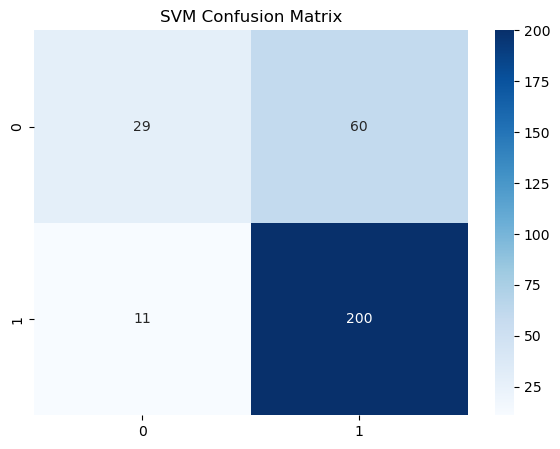

In [35]:
# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('SVM Confusion Matrix')
plt.show()

In [36]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

# Model Comparison

In [38]:
# Summary of accuracies
model_accuracies = {
    'Logistic_Regression':logreg_accuracy,
    'K-Nearest neighbors': knn_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Support vector machine': svm_accuracy
}

#Display accuracies
for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy*100:.2f}%')

Logistic_Regression Accuracy: 76.00%
K-Nearest neighbors Accuracy: 74.67%
Decision Tree Accuracy: 68.33%
Support vector machine Accuracy: 76.33%


# Optimization in Machine Learning

In [39]:
from sklearn.model_selection import GridSearchCV


In [48]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [41]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [43]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
# Logistic Regression Optimization
logreg_param_grid = {
    'C': [0.1, 1, 10], # regularization parameter
    'solver':['lbfgs', 'liblinear'], #Solver to use
    'max_iter': [100,200,300] # Maximum number of iterations
    
}

logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid,cv =5, scoring ='accuracy' )
logreg_grid_search.fit(X_train, y_train)
logreg_best_params = logreg_grid_search.best_params_
logreg_best_accuracy = logreg_grid_search.best_score_


In [46]:
#K-Nearest Neighbors Optimization
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [47]:
knn_param_grid = {
    'n_neighbors': [3,5,7,10], # No of Neighbors
    'weights' : ['uniform', 'distance'], #weight function used in prediction
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] # Algorithm used to compute the nearest neighbor
    
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid,cv =5, scoring ='accuracy' )
knn_grid_search.fit(X_train, y_train)
knn_best_params = knn_grid_search.best_params_
knn_best_accuracy = knn_grid_search.best_score_

In [51]:
#Decision Tree Optimization
decision_tree_param_grid = {
    'max_depth':[3,5,10,None], 
    'min_samples_split':[2,5,10], 
    'min_samples_leaf': [1,2,4],
    'criterion' : ["gini", "entropy", "log_loss"]

}

decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid,cv =5, scoring ='accuracy' )
decision_tree_grid_search.fit(X_train, y_train)
decision_tree_best_params = decision_tree_grid_search.best_params_
decision_tree_best_accuracy = decision_tree_grid_search.best_score_

In [49]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [52]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# --- Random Forest Optimization ---
rf_param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [3, 5, 10, None],         # Maximum depth of tree
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]          # Minimum samples at leaf node
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy'
)

rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_
rf_best_accuracy = rf_grid_search.best_score_



In [53]:


svm_param_grid = {
    'C': [0.1, 1, 10],                     # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel types
    'gamma': ['scale', 'auto']             # Kernel coefficient (for rbf, poly, sigmoid)
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
svm_grid_search.fit(X_train, y_train)

# Best parameters and best score
svm_best_params = svm_grid_search.best_params_
svm_best_accuracy = svm_grid_search.best_score_



In [54]:
# --- Print results for all models ---

print("Logistic Regression Best Params:", logreg_best_params)
print("Logistic Regression Best Accuracy:", logreg_best_accuracy)

print("\nK-Nearest Neighbors Best Params:", knn_best_params)
print("K-Nearest Neighbors Best Accuracy:", knn_best_accuracy)

print("\nDecision Tree Best Params:", decision_tree_best_params)
print("Decision Tree Best Accuracy:", decision_tree_best_accuracy)

print("\nRandom Forest Best Params:", rf_best_params)
print("Random Forest Best Accuracy:", rf_best_accuracy)

print("\nSupport Vector Machine Best Params:", svm_best_params)
print("Support Vector Machine Best Accuracy:", svm_best_accuracy)


Logistic Regression Best Params: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Logistic Regression Best Accuracy: 0.7385714285714287

K-Nearest Neighbors Best Params: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
K-Nearest Neighbors Best Accuracy: 0.75

Decision Tree Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Best Accuracy: 0.7628571428571429

Random Forest Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best Accuracy: 0.7957142857142857

Support Vector Machine Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine Best Accuracy: 0.7485714285714286
